<a href="https://colab.research.google.com/github/adalves-ufabc/2024-Palestra-EY/blob/main/2024_Palestra_EY_LangChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Palestra: LangChain em ação: o maestro digital para soluções com IA Generativa**
### Prof. Alexandre Donizeti Alves
##### Universidade Federal do ABC [UFABC]

E-mail: alexandre.donizeti@ufabc.edu.br

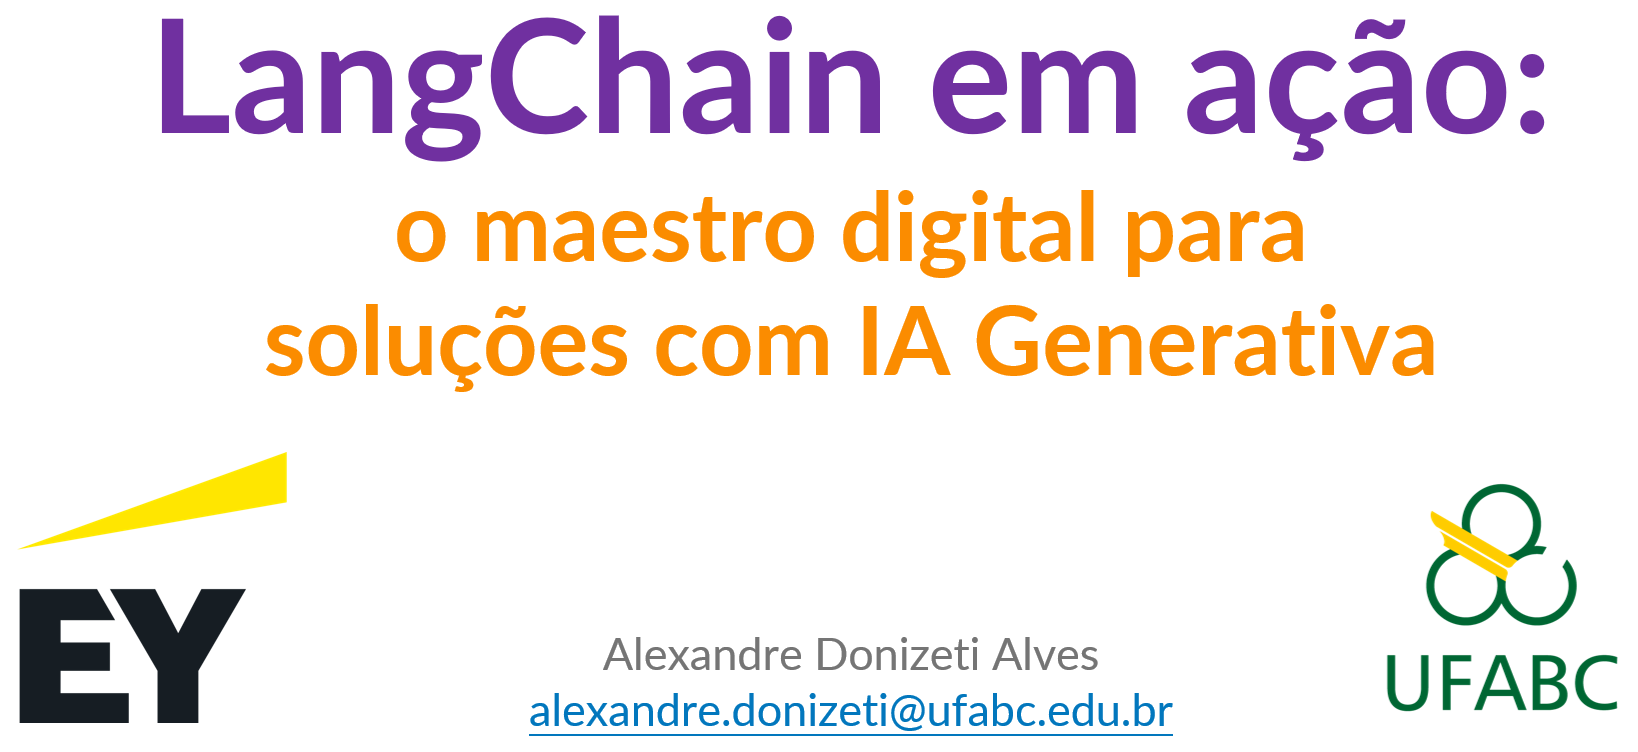

# **LangChain**

---

[`Janeiro de 2024`]

## **Instalação e configuração**

O primeiro passo é instalar o pacote de integração `LangChain` x `OpenAI`. Também será instalado o pacote do `LangChain`.

In [ ]:
!pip install langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
tensorflow

In [ ]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.6/803.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.3 MB/s eta 0:00:00


In [ ]:
!pip show langchain

Name: langchain
Version: 0.1.4
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, async-timeout, dataclasses-json, jsonpatch, langchain-community, langchain-core, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: 


O acesso à `API` requer uma **chave**, que você pode obter criando uma conta e acessando [aqui](https://platform.openai.com/account/api-keys).

In [ ]:
from getpass import getpass

OPENAI_API_KEY = getpass()

··········


## **Cadeia LLM (*LLM Chain*)**

Uma cadeia em **LangChain** é composta de combinações, que podem ser primitivos como LLMs ou outras cadeias.

Podemos então inicializar o modelo:

In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI( openai_api_key= OPENAI_API_KEY, temperature = 0.9, max_tokens= 50 )

Depois de instalar e inicializar o LLM de sua escolha, podemos tentar usá-lo!

In [ ]:
prompt = "Qual seria um bom nome para uma empresa que fabrica meias coloridas? Responda em Português e retorne apenas o nome da empresa"

llm.invoke(prompt)

AIMessage(content='Arco-Íris Meias')

**Modelos de *prompt***

Também podemos orientar sua resposta com um modelo de *prompt*. Os modelos de *prompt* são usados para converter a entrada bruta do usuário em uma entrada melhor para o LLM.

In [ ]:
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate(
    input_variables = ["produto"],
    template = "Qual seria um bom nome para uma empresa que fabrica {produto}? Responda em Português e retorne apenas o nome da empresa?",
)

Agora podemos combiná-los em uma cadeia LLM simples:

In [ ]:
chain = prompt | llm

In [ ]:
chain.invoke({"produto": "meias coloridas"})

AIMessage(content='ColorSocks')

**Referência**:

https://ricardo-reis.medium.com/langchain-guia-de-in%C3%ADcio-r%C3%A1pido-138284ec8681

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

prompt = ChatPromptTemplate.from_messages([
    ("system", "Você é um estrategista de marketing digital especializado em {setor}"),
    ("user", "Considerando a crescente digitalização no {setor}, proponha um slogan cativante para uma campanha publicitária.")
])

chain = prompt | llm

In [ ]:
chain.invoke({"setor": "contábil"})

AIMessage(content='"Contabilidade digital: simplificando sua vida financeira, um clique de cada vez!"')

**Referências**:

https://python.langchain.com/docs/expression_language/cookbook/prompt_llm_parser

https://python.langchain.com/docs/get_started/quickstart

## **Extração de Informação**

Suponha que você precise da saída do modelo formatada com um esquema específico para:

* Extrair uma linha estruturada para inserir em um banco de dados;
* Extrair parâmetros de uma API;
* Extrair diferentes partes de uma consulta do usuário (por exemplo, para uma pesquisa por palavra-chave).

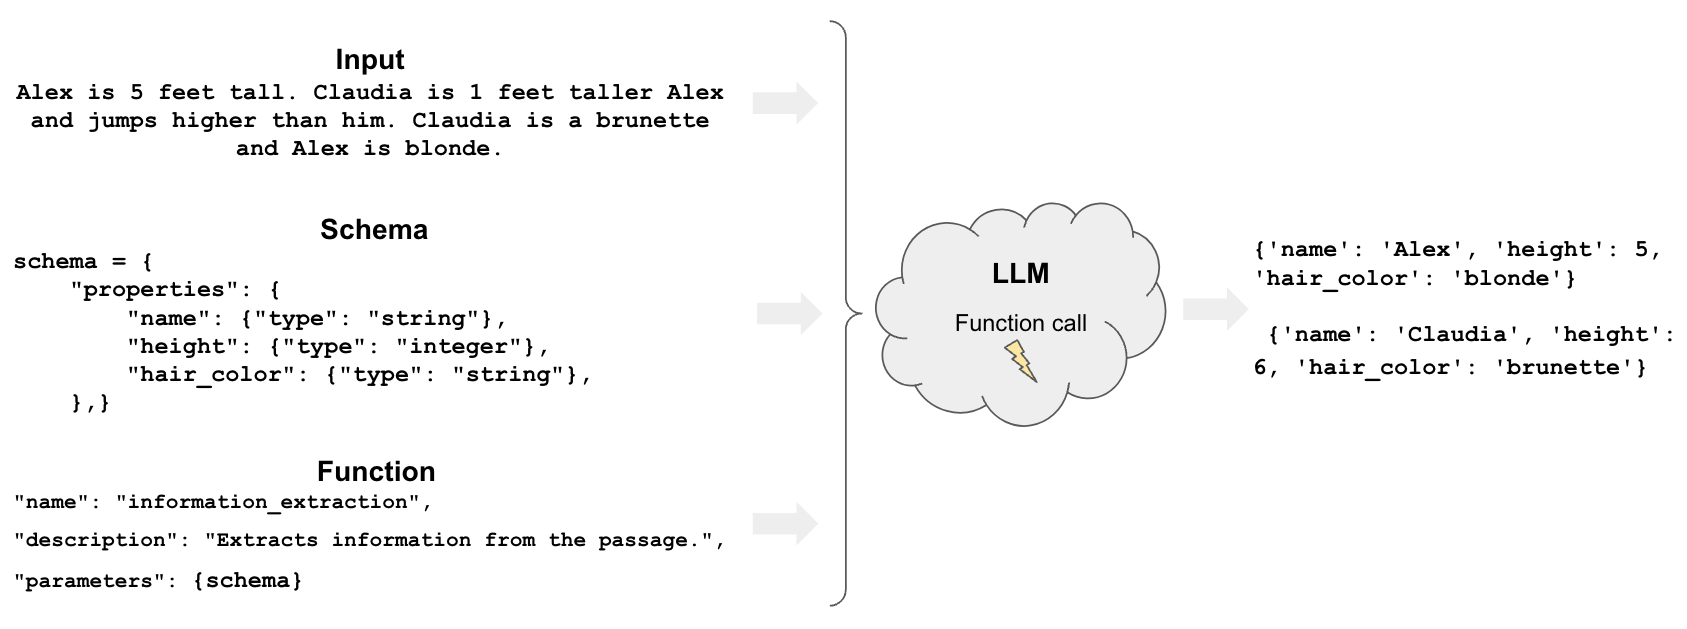

In [ ]:
from langchain.chains import create_extraction_chain
from langchain_openai import ChatOpenAI

# schema
schema = {
    "properties": {
        "nome": {"type": "string"},
        "altura": {"type": "integer"},
        "cor_cabelo": {"type": "string"},
    },
    "required": ["nome", "altura"],
}

# input
input = """Alex tem 1,50 metro de altura. Claudia é 30 centímetros mais alta que Alex e salta mais alto que ele. Claudia é morena e Alex é loiro."""

# run chain
llm = ChatOpenAI(openai_api_key = OPENAI_API_KEY, temperature = 0, model = "gpt-3.5-turbo")
chain = create_extraction_chain(schema, llm)

In [ ]:
chain.invoke(input)

{'input': 'Alex tem 1,50 metro de altura. Claudia é 30 centímetros mais alta que Alex e salta mais alto que ele. Claudia é morena e Alex é loiro.',
 'text': [{'nome': 'Alex', 'altura': 1.5, 'cor_cabelo': 'loiro'},
  {'nome': 'Claudia', 'altura': 1.8, 'cor_cabelo': 'morena'}]}

In [ ]:
resposta = chain.invoke(input)

type(resposta)

dict

In [ ]:
print("Texto de entrada:", resposta['input'])

Texto de entrada: Alex tem 1,50 metro de altura. Claudia é 30 centímetros mais alta que Alex e salta mais alto que ele. Claudia é morena e Alex é loiro.


In [ ]:
print(resposta['text'][0]['nome'])

Alex


In [ ]:
for pessoa in resposta['text']:
    print(f"Nome: {pessoa['nome']}, Altura: {pessoa['altura']} metros, Cor do cabelo: {pessoa['cor_cabelo']}")

Nome: Alex, Altura: 1.5 metros, Cor do cabelo: loiro
Nome: Claudia, Altura: 1.8 metros, Cor do cabelo: morena


**Referências**:

https://python.langchain.com/docs/use_cases/extraction

https://medium.com/@ingridwickstevens/extract-structured-data-from-unstructured-text-using-llms-71502addf52b



## **Tagging**

***Tagging*** significa rotular um documento com classes tais como:

*   sentimento
*   idioma
*   estilo
*   tópicos
*   etc.



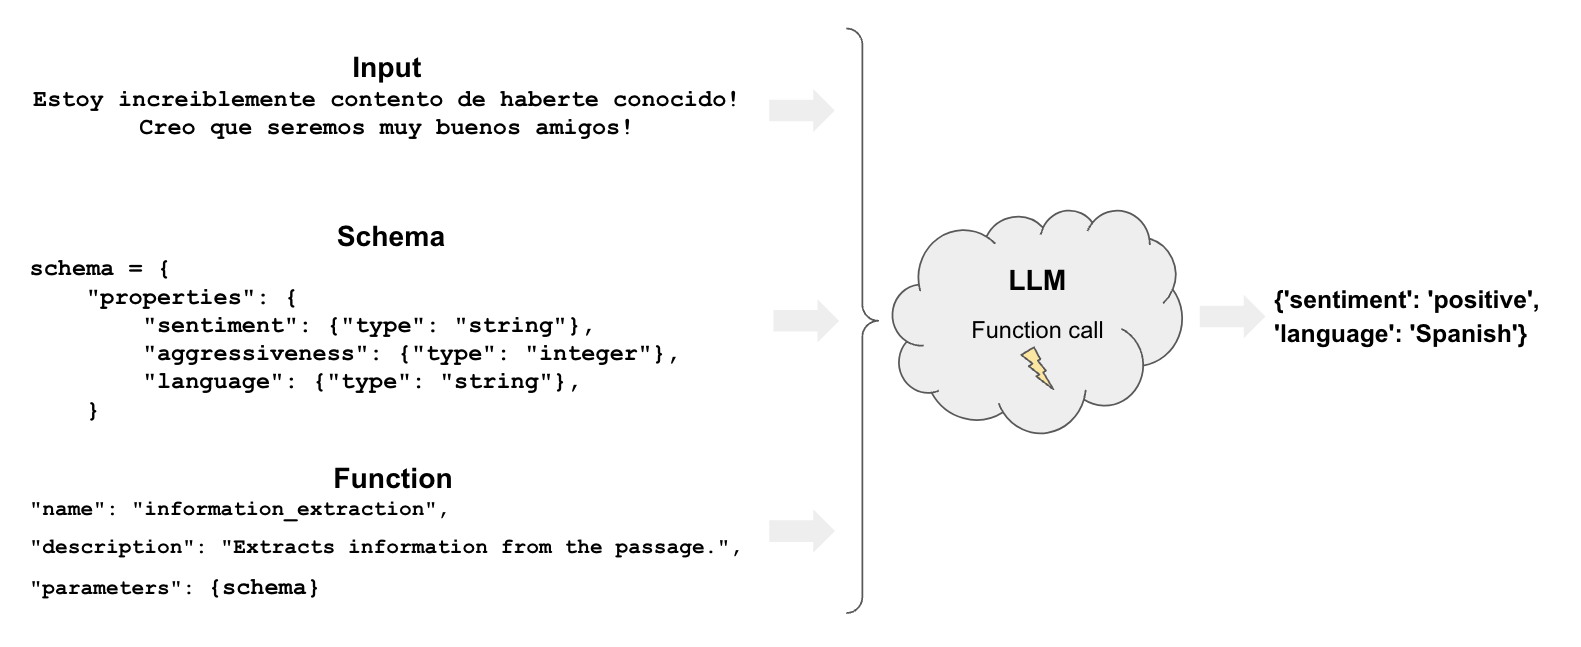

In [ ]:
from langchain.chains import create_tagging_chain
from langchain_openai import ChatOpenAI

# schema
schema = {
    "properties": {
        "sentiment": {"type": "string"},
        "aggressiveness": {"type": "integer"},
        "language": {"type": "string"},
    }
}

# llm
llm = ChatOpenAI(openai_api_key = OPENAI_API_KEY, temperature=0, model="gpt-3.5-turbo-0613")
chain = create_tagging_chain(schema, llm)

In [ ]:
input = "Estoy increiblemente contento de haberte conocido! Creo que seremos muy buenos amigos!"
chain.invoke(input)

{'input': 'Estoy increiblemente contento de haberte conocido! Creo que seremos muy buenos amigos!',
 'text': {'sentiment': 'positive', 'language': 'Spanish'}}

In [ ]:
input = "Estoy muy enojado con vos! Te voy a dar tu merecido!"
chain.invoke(input)

{'input': 'Estoy muy enojado con vos! Te voy a dar tu merecido!',
 'text': {'sentiment': 'enojado', 'aggressiveness': 1, 'language': 'es'}}

**Controle mais preciso**

In [ ]:
schema = {
    "properties": {
        "sentiment": {
            "type": "integer",
            "enum": [-1, 0, 1],
            "description": "-1 for negative; 0 for neutral and 1 for positive sentiment",
        },
        "aggressiveness": {
            "type": "integer",
            "enum": [1, 2, 3, 4, 5],
            "description": "describes how aggressive the statement is, the higher the number the more aggressive. 0 is no aggression",
        },
        "language": {
            "type": "string",
            "enum": ["spanish", "English", "french", "german", "italian", "Portuguese"],
        },
    },
    "required": ["language", "sentiment", "aggressiveness"],
}

In [ ]:
chain = create_tagging_chain(schema, llm)

In [ ]:
input = "Estoy increiblemente contento de haberte conocido! Creo que seremos muy buenos amigos!"
chain.invoke(input)

{'input': 'Estoy increiblemente contento de haberte conocido! Creo que seremos muy buenos amigos!',
 'text': {'sentiment': '1', 'aggressiveness': '1', 'language': 'spanish'}}

In [ ]:
input = "Estoy muy enojado con vos! Te voy a dar tu merecido!"
chain.invoke(input)

{'input': 'Estoy muy enojado con vos! Te voy a dar tu merecido!',
 'text': {'sentiment': '-1', 'aggressiveness': '5', 'language': 'spanish'}}

In [ ]:
input = "I am very angry with you! I'm going to give you what you deserve!"
chain.invoke(input)

{'input': "I am very angry with you! I'm going to give you what you deserve!",
 'text': {'sentiment': '-1', 'aggressiveness': '5', 'language': 'English'}}

In [ ]:
input = "Estou muito zangado contigo! Eu vou te dar o que você merece!"
chain.invoke(input)

{'input': 'Estou muito zangado contigo! Eu vou te dar o que você merece!',
 'text': {'sentiment': '-1', 'aggressiveness': '5', 'language': 'Portuguese'}}

## **Tool**

Uma ***tool*** (ferramenta) é uma função que realiza uma tarefa específica, como uma pesquisa no Google, consulta ao banco de dados etc. A interface de uma ***tool*** é uma função que recebe uma string como entrada e retorna uma string como saída.

Existem duas maneiras principais de usar ferramentas: **cadeias** e **agentes**.

**Cadeias** (*chains*) permitem criar uma sequência predefinida de uso(s) de ferramentas (*tools*).


tool_chain-3571e7fbc481d648aff93a2630f812ab.svg

Os **agentes** permitem que o modelo use as ferramentas em um loop, para que ele possa decidir quantas vezes usar as ferramentas.

tool_agent-d25fafc271da3ee950ac1fba59cdf490.svg

As ferramentas podem ser praticamente qualquer coisa – APIs, funções, bancos de dados etc. As ferramentas nos permitem estender os recursos de um modelo além da simples saída de texto/mensagens. A chave para usar modelos com ferramentas é solicitar corretamente um modelo e analisar sua resposta para que ele escolha as ferramentas certas e forneça as entradas certas para elas.

**Criando uma ferramenta**

Primeiro, precisamos criar uma ferramenta para chamar. Para este exemplo, vamos criar uma ferramenta personalizada a partir de uma função.

In [ ]:
from langchain_core.tools import tool

@tool
def multiply(first_int: int, second_int: int) -> int:
    """Multiply two integers together."""
    return first_int * second_int

In [ ]:
print(multiply.name)
print(multiply.description)
print(multiply.args)

multiply
multiply(first_int: int, second_int: int) -> int - Multiply two integers together.
{'first_int': {'title': 'First Int', 'type': 'integer'}, 'second_int': {'title': 'Second Int', 'type': 'integer'}}


In [ ]:
multiply.invoke({"first_int": 4, "second_int": 5})

20

#### **Cadeias**

Se soubermos que só precisamos usar uma ferramenta um número fixo de vezes, podemos criar uma **cadeia** para fazer isso. Vamos criar uma **cadeia** simples que apenas multiplica números especificados pelo usuário.

Uma das formas mais confiáveis de usar ferramentas com LLMs é por meio de APIs de chamada de função. Isso funciona apenas com modelos que suportam explicitamente chamadas de função, como os modelos da OpenAI.

Primeiro definiremos nosso modelo e ferramentas. Começaremos com apenas uma ferramenta.

In [ ]:
from langchain_openai.chat_models import ChatOpenAI

modelo = ChatOpenAI(openai_api_key = OPENAI_API_KEY, model="gpt-3.5-turbo-1106")

In [ ]:
modelo_ferramenta = modelo.bind_tools([multiply], tool_choice="multiply")

In [ ]:
modelo_ferramenta.kwargs["tools"]

[{'type': 'function',
  'function': {'name': 'multiply',
   'description': 'multiply(first_int: int, second_int: int) -> int - Multiply two integers together.',
   'parameters': {'type': 'object',
    'properties': {'first_int': {'type': 'integer'},
     'second_int': {'type': 'integer'}},
    'required': ['first_int', 'second_int']}}}]

In [ ]:
modelo_ferramenta.kwargs["tool_choice"]

{'type': 'function', 'function': {'name': 'multiply'}}

"Agora vamos compor nosso modelo de chamada de ferramenta com um `JsonOutputToolsParser`, um analisador de saída integrado do **LangChain** que converte uma resposta de chamada de função OpenAI em uma lista de dicionários no formato {"type": "TOOL_NAME", "args": {...}} com as ferramentas a serem invocadas e os argumentos para invocá-las."

In [ ]:
from langchain.output_parsers import JsonOutputToolsParser

chain = modelo_ferramenta | JsonOutputToolsParser()
chain.invoke("Quanto é quatro vezes 23")

[{'type': 'multiply', 'args': {'first_int': 4, 'second_int': 23}}]

Como sabemos que sempre estamos invocando a ferramenta `multiplicar`, podemos simplificar um pouco a nossa saída, retornando apenas os argumentos para a ferramenta `multiply` usando o `JsonOutputKeyToolsParser`. Para simplificar ainda mais, especificaremos `return_single=True`, para que, em vez de uma lista de invocações de ferramentas, nosso analisador de saída retorne apenas a primeira invocação de ferramenta.

In [ ]:
from langchain.output_parsers import JsonOutputKeyToolsParser

chain = (
    modelo_ferramenta
    | JsonOutputKeyToolsParser(key_name="multiply", return_single=True)
)
chain.invoke("Quanto é quatro vezes 23")

{'first_int': 4, 'second_int': 23}

**Invocando a ferramenta**

In [ ]:
from operator import itemgetter

chain = (
    modelo_ferramenta
    | JsonOutputKeyToolsParser(key_name="multiply", return_single=True)
    | multiply
)
chain.invoke("Quanto é quatro vezes 23")

92

#### **Agentes**


**Cadeias** são ótimas quando conhecemos a sequência específica de uso de ferramentas necessária para qualquer entrada do usuário. No entanto, para determinados casos de uso, a quantidade de vezes que usamos ferramentas depende da entrada. Nestes casos, queremos permitir que o próprio modelo decida quantas vezes usar as ferramentas e em que ordem. Os **agentes** nos permitem fazer exatamente isso.

O **LangChain** vem com vários **agentes** integrados otimizados para diferentes casos de uso.



Como exemplo, vamos experimentar o agente de ferramentas OpenAI, que faz uso da nova API de chamada de ferramentas da OpenAI (isso está disponível apenas nos modelos mais recentes da OpenAI e difere da chamada de função no sentido de que o modelo pode retornar várias invocações de função de uma vez).

In [ ]:
!pip install langchainhub

In [ ]:
from langchain import hub
from langchain.agents import AgentExecutor, create_openai_tools_agent
from langchain_openai import ChatOpenAI

In [ ]:
prompt = hub.pull("hwchase17/openai-tools-agent")
prompt.messages

[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template='You are a helpful assistant')),
 MessagesPlaceholder(variable_name='chat_history', optional=True),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], template='{input}')),
 MessagesPlaceholder(variable_name='agent_scratchpad')]

Os **agentes** também são ótimos porque facilitam o uso de várias ferramentas. Para aprender como construir **cadeias** que usam múltiplas ferramentas, confira a página [Choosing between multiple tools](https://python.langchain.com/docs/use_cases/tool_use/multiple_tools).

In [ ]:
@tool
def add(first_int: int, second_int: int) -> int:
    "Add two integers."
    return first_int + second_int

@tool
def exponentiate(base: int, exponent: int) -> int:
    "Exponentiate the base to the exponent power."
    return base**exponent

tools = [multiply, add, exponentiate]

In [ ]:
# choose the LLM that will drive the agent
# Ooly certain models support this
modelo = ChatOpenAI(openai_api_key = OPENAI_API_KEY, model="gpt-3.5-turbo-1106", temperature=0)

# construct the OpenAI Tools agent
agente = create_openai_tools_agent(modelo, tools, prompt)

In [ ]:
# create an agent executor by passing in the agent and tools
agente_executor = AgentExecutor(agent=agente, tools=tools, verbose=True)

In [ ]:
agente_executor.invoke(
    {
        "input": "Faça 3 elevado à quinta potência e multiplique pela soma de doze e três e, em seguida, eleve ao quadrado o resultado total"
    }
)



> Entering new AgentExecutor chain...

Invoking: `exponentiate` with `{'base': 3, 'exponent': 5}`


243
Invoking: `add` with `{'first_int': 12, 'second_int': 3}`


15
Invoking: `multiply` with `{'first_int': 243, 'second_int': 15}`


3645
Invoking: `exponentiate` with `{'base': 3645, 'exponent': 2}`


13286025O resultado de elevar 3 à quinta potência e multiplicar pela soma de doze e três, e em seguida elevar ao quadrado o resultado total é 13,286,025.

> Finished chain.


{'input': 'Faça 3 elevado à quinta potência e multiplique pela soma de doze e três e, em seguida, eleve ao quadrado o resultado total',
 'output': 'O resultado de elevar 3 à quinta potência e multiplicar pela soma de doze e três, e em seguida elevar ao quadrado o resultado total é 13,286,025.'}

## **Grafos de Conhecimento**

Um **grafo de conhecimento** é uma representação gráfica que organiza e relaciona informações de maneira estruturada. Nesse tipo de representação, os **nós** do grafo representam entidades, conceitos ou pontos de dados, e as **arestas** indicam as relações entre esses elementos. Essas relações podem incluir conexões lógicas, hierárquicas, causais ou outras interações.



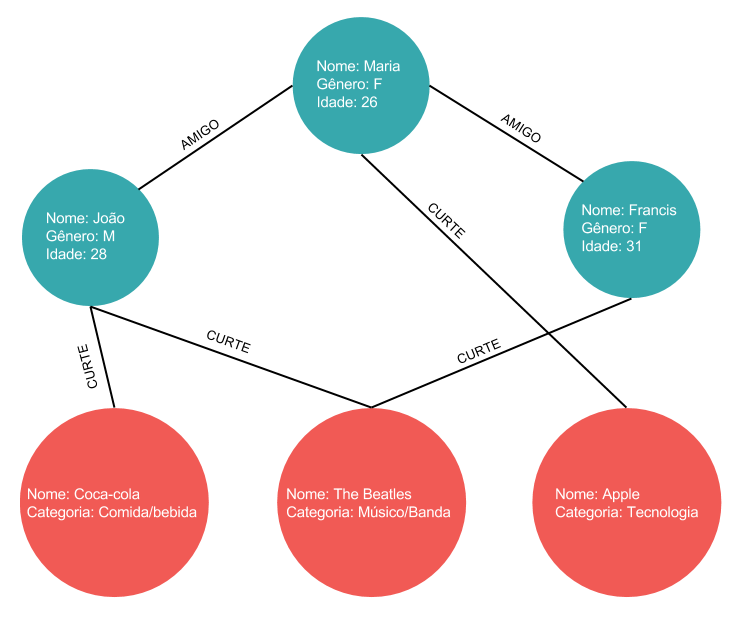

**NetworkX**

In [ ]:
!pip install --upgrade --quiet  networkx

In [ ]:
from langchain.indexes import GraphIndexCreator
from langchain_openai import OpenAI

index_creator = GraphIndexCreator(llm = OpenAI(openai_api_key = OPENAI_API_KEY, temperature=0))

In [ ]:
text = "OpenAI é a empresa por trás do modelo de linguagem ChatGPT. Ela foi fundada, em 2015, por Elon Musk – que deixou a companhia em 2018 – e Sam Altman"

In [ ]:
graph = index_creator.from_text(text)

In [ ]:
graph.get_triples()

[('OpenAI', 'ChatGPT', 'é a empresa por trás do modelo de linguagem'),
 ('OpenAI', 'em 2015', 'foi fundada'),
 ('OpenAI', 'Elon Musk', 'foi fundada por'),
 ('OpenAI', 'Sam Altman', 'foi fundada por'),
 ('Elon Musk', 'a companhia', 'deixou')]

In [ ]:
from langchain.chains import GraphQAChain

chain = GraphQAChain.from_llm(OpenAI(openai_api_key = OPENAI_API_KEY, temperature=0), graph=graph, verbose=True)

In [ ]:
chain.invoke("Quem fundou a OpenAI?")



> Entering new GraphQAChain chain...
Entities Extracted:
 OpenAI
Full Context:
OpenAI é a empresa por trás do modelo de linguagem ChatGPT
OpenAI foi fundada em 2015
OpenAI foi fundada por Elon Musk
OpenAI foi fundada por Sam Altman

> Finished chain.


{'query': 'Quem fundou a OpenAI?',
 'result': ' A OpenAI foi fundada por Elon Musk e Sam Altman.'}

In [ ]:
chain.invoke("Em que ano foi fundada a OpenAI?")



> Entering new GraphQAChain chain...
Entities Extracted:
 OpenAI
Full Context:
OpenAI é a empresa por trás do modelo de linguagem ChatGPT
OpenAI foi fundada em 2015
OpenAI foi fundada por Elon Musk
OpenAI foi fundada por Sam Altman

> Finished chain.


{'query': 'Em que ano foi fundada a OpenAI?',
 'result': '\nA OpenAI foi fundada em 2015.'}

**Referência:**

https://python.langchain.com/docs/use_cases/graph/graph_networkx_qa

In [ ]:
from langchain.indexes import GraphIndexCreator
from langchain_openai import OpenAI

index_creator = GraphIndexCreator(llm=OpenAI(openai_api_key = OPENAI_API_KEY, temperature=0))

graph = index_creator.from_text('Microsoft Invests $10 Billion in ChatGPT OpenAI.')

In [ ]:
print(graph.get_triples())

[('Microsoft', '$10 Billion', 'invests'), ('Microsoft', 'ChatGPT', 'invests in'), ('ChatGPT', 'OpenAI', 'is owned by')]


In [ ]:
from langchain.graphs.networkx_graph import KnowledgeTriple

graph.add_triple(KnowledgeTriple('Google', '$300 Million', 'invests'))
graph.add_triple(KnowledgeTriple('Google', 'Anthropic', 'invests in'))

In [ ]:
graph.get_triples()

[('Microsoft', '$10 Billion', 'invests'),
 ('Microsoft', 'ChatGPT', 'invests in'),
 ('ChatGPT', 'OpenAI', 'is owned by'),
 ('Google', 'invests', '$300 Million'),
 ('Google', 'invests in', 'Anthropic')]

In [ ]:
from langchain.chains import GraphQAChain

chain = GraphQAChain.from_llm(OpenAI(openai_api_key = OPENAI_API_KEY, temperature=0), graph=graph, verbose=True)

In [ ]:
chain.invoke("What is the total investment made by Microsoft in OpenAI?")



> Entering new GraphQAChain chain...
Entities Extracted:
 Microsoft, OpenAI
Full Context:
Microsoft invests $10 Billion
Microsoft invests in ChatGPT

> Finished chain.


{'query': 'What is the total investment made by Microsoft in OpenAI?',
 'result': '\nMicrosoft has invested a total of $10 billion in OpenAI.'}

In [ ]:
chain.invoke("How much has Google already invested?")



> Entering new GraphQAChain chain...
Entities Extracted:
 Google
Full Context:
Google $300 Million invests
Google Anthropic invests in

> Finished chain.


{'query': 'How much has Google already invested?',
 'result': '\nGoogle has invested $300 million.'}

**Referência:**

https://apex974.com/articles/explore-langchain-support-for-knowledge-graph

## **Integração**

#### **Cohere**

**Cohere** é uma *startup* canadense que fornece modelos de Processamento de Linguagem Natural que ajudam as empresas e desenvolvedores a melhorar as interações homem-máquina.

In [ ]:
!pip install cohere

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.1 MB/s eta 0:00:00
  Attempting uninstall: importlib_metadata
    Found existing installation: importlib-metadata 7.0.1
    Uninstalling importlib-metadata-7.0.1:
      Successfully uninstalled importlib-metadata-7.0.1


Também precisaremos obter uma chave de API **Cohere** e definir a variável de ambiente `COHERE_API_KEY`:

In [ ]:
import getpass


COHERE_API_KEY = getpass.getpass()

··········


In [ ]:
import cohere

co = cohere.Client( api_key= COHERE_API_KEY )

resposta = co.generate(
  prompt='Please explain to me how LLMs work',
)

In [ ]:
print(resposta)

[cohere.Generation {
	id: e5957059-133a-4e88-9ac6-12a9eddadfa3
	prompt: Please explain to me how LLMs work
	text:  LLMs, or Large Language Models, are a type of neural network specifically designed to understand and generate human-like language. They are constructed based on the architecture of neural networks and are trained on massive amounts of text data, permitting them to grasp patterns and connections in language.

The training process of LLMs involves providing vast amounts of text data as input to the model, which is continuously adjusted to predict upcoming words in a sentence. This process is known as language modeling, and it enables the LLM to learn the underlying structure and patterns of the language. 

When an LLM generates text, it processes the input text it has been given to forecast the next word or sequence of words. It does so by utilizing the patterns and information it acquired during the training phase. This permits the LLM to generate sensible and coherent repl

In [ ]:
resposta

,prompt,text
0,Please explain to me how LLMs work,"LLMs, or Large Language Models, are a type of neural network specifically designed to understand and generate human-like language. They are constructed based on the architecture of neural networks and are trained on massive amounts of text data, permitting them to grasp patterns and connections in language. The training process of LLMs involves providing vast amounts of text data as input to the model, which is continuously adjusted to predict upcoming words in a sentence. This process is known as language modeling, and it enables the LLM to learn the underlying structure and patterns of the language. When an LLM generates text, it processes the input text it has been given to forecast the next word or sequence of words. It does so by utilizing the patterns and information it acquired during the training phase. This permits the LLM to generate sensible and coherent replies to prompts or to complete sentences. Overall, LLMs demonstrate a remarkable capacity to comprehend and produce language, positioning them as progressive tools in NLP and AI. However, it is crucial to bear in mind that LLMs still have limitations and can sometimes generate incorrect or biased output. It's important to note that LLMs are a subset of NLP (Natural Language Processing) models, and are designed to handle sequential data and learning problems that involve sequential data. NLP is a broader field that covers multiple techniques for analyzing and processing language, while LLMs are a specific type of neural network architecture designed to handle language-specific tasks."


In [ ]:
resposta[0].prompt

'Please explain to me how LLMs work'

In [ ]:
print(resposta[0].text)

 LLMs, or Large Language Models, are a type of neural network specifically designed to understand and generate human-like language. They are constructed based on the architecture of neural networks and are trained on massive amounts of text data, permitting them to grasp patterns and connections in language.

The training process of LLMs involves providing vast amounts of text data as input to the model, which is continuously adjusted to predict upcoming words in a sentence. This process is known as language modeling, and it enables the LLM to learn the underlying structure and patterns of the language. 

When an LLM generates text, it processes the input text it has been given to forecast the next word or sequence of words. It does so by utilizing the patterns and information it acquired during the training phase. This permits the LLM to generate sensible and coherent replies to prompts or to complete sentences. 

Overall, LLMs demonstrate a remarkable capacity to comprehend and produ

**Referência:**

https://docs.cohere.com/reference/generate

**LLM**

A **integração** é feita usando o pacote `langchain-community`. Também precisamos instalar o próprio pacote `cohere`. Podemos instalá-los com:

In [ ]:
!pip install -U langchain-community cohere

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.3/230.3 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 7.8 MB/s eta 0:00:00


In [ ]:
from langchain_community.llms import Cohere
from langchain_core.prompts import PromptTemplate

modelo = Cohere(cohere_api_key= COHERE_API_KEY, model="command", max_tokens=256, temperature=0.75)

prompt = PromptTemplate.from_template("Tell me a joke about {topic}")
chain = prompt | modelo

In [ ]:
chain.invoke({"topic": "bears"})

' What color socks do bears wear?\n\nThey don’t wear socks, they have bear feet.'

**Referência:**

https://python.langchain.com/docs/integrations/llms/cohere

**Mais um exemplo**

In [ ]:
perfil = "I am a 25 year old young man. I work as a computer programmer and am a Computer Science student. My hobby is cooking every day. On weekends, I like watching Formula 1 races and following news about the environment."

In [ ]:
from langchain_community.llms import Cohere
from langchain_core.prompts import PromptTemplate

modelo = Cohere(
    cohere_api_key=COHERE_API_KEY,
    temperature=0,
    max_tokens=500
)

prompt = PromptTemplate.from_template("Which emotions or feelings would you attribute to the following description: {text}")
chain = prompt | modelo

In [ ]:
interests = chain.invoke({"text": perfil})

print(interests)

 This description brings up a variety of emotions, including: 

1. Passionate: The person sounds very passionate about their work, studying, their cooking hobby, and their interest in Formula 1 and environmental news. They engage in these activities not only on weekends but also during the weekdays, indicating that these activities are an integral part of their life and they take pleasure in them. 

2. Dedicated: Their job, academic studies, and hobbies require dedication and effort to excel in. They allocate their time to their job, studying, and hobbies during the week as well as on the weekends. 

3. Curious: They are curious to learn about technological developments in computer programming, and they are also curious about environmental news and Formula 1 racing events. 

4. Concerned: They indicate that they actively follow environmental news, which suggests that they care deeply about environmental issues. Thus, their description also expresses a concerned sentiment about the stat

**Classificação**

In [ ]:
import cohere
from cohere.responses.classify import Example

co = cohere.Client( api_key= COHERE_API_KEY )

examples=[
  Example("Dermatologists don't like her!", "Spam"),
  Example("'Hello, open to this?'", "Spam"),
  Example("I need help please wire me $1000 right now", "Spam"),
  Example("Nice to know you ;)", "Spam"),
  Example("Please help me?", "Spam"),
  Example("Your parcel will be delivered today", "Not spam"),
  Example("Review changes to our Terms and Conditions", "Not spam"),
  Example("Weekly sync notes", "Not spam"),
  Example("'Re: Follow up from today's meeting'", "Not spam"),
  Example("Pre-read for tomorrow", "Not spam"),
]
inputs=[
  "Confirm your email address",
  "hey i need u to send some $",
]

resposta = co.classify(
  inputs = inputs,
  examples = examples,
)

In [ ]:
resposta[0]

Classification<prediction: "Not spam", confidence: 0.5661598, labels: {'Not spam': LabelPrediction(confidence=0.5661598), 'Spam': LabelPrediction(confidence=0.43384025)}>

In [ ]:
resposta[1]

Classification<prediction: "Spam", confidence: 0.9909811, labels: {'Not spam': LabelPrediction(confidence=0.009018883), 'Spam': LabelPrediction(confidence=0.9909811)}>

**Referência:**

https://docs.cohere.com/reference/classify

**Análise de Sentimento**

In [ ]:
import cohere
from cohere.responses.classify import Example

co = cohere.Client( api_key= COHERE_API_KEY )

examples=[
  Example("The order came 5 days early", "positive review"),
  Example("The item exceeded my expectations", "positive review"),
  Example("I ordered more for my friends", "positive review"),
  Example("I would buy this again", "positive review"),
  Example("I would recommend this to others", "positive review"),
  Example("The package was damaged", "negative review"),
  Example("The order is 5 days late", "negative review"),
  Example("The order was incorrect", "negative review"),
  Example("I want to return my item", "negative review"),
  Example("The item's material feels low quality", "negative review"),
  Example("The product was okay", "neutral review"),
  Example("I received five items in total", "neutral review"),
  Example("I bought it from the website", "neutral review"),
  Example("I used the product this morning", "neutral review"),
  Example("The product arrived yesterday", "neutral review")
]

inputs=[
  "This item was broken when it arrived",
  "The product was not too bad"
]

resposta = co.classify(
  inputs = inputs,
  examples = examples,
)

In [ ]:
resposta[0]

Classification<prediction: "negative review", confidence: 0.98538816, labels: {'negative review': LabelPrediction(confidence=0.98538816), 'neutral review': LabelPrediction(confidence=0.013513258), 'positive review': LabelPrediction(confidence=0.0010986066)}>

In [ ]:
for item in resposta:
    print(item.predictions)
#    print(item.confidences)
#    print(item.labels)

['negative review']
['neutral review']


**Referência:**

https://docs.cohere.com/reference/sentiment-analysis